In [30]:
#using Principal Component Analysis to compress data with multiple attributes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()

In [19]:
df=pd.DataFrame(cancer['data'],columns= cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
#these are the two categorizations of the types of breast tumors
print(cancer['target_names'])

['malignant' 'benign']


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
scaler.fit(df)

StandardScaler()

In [9]:
scaled_data = scaler.transform(df)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(n_components=2)

In [15]:
x_pca = pca.transform(scaled_data)

In [22]:
#reducing the multiple (30) components down to 2 for simpler categorization
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


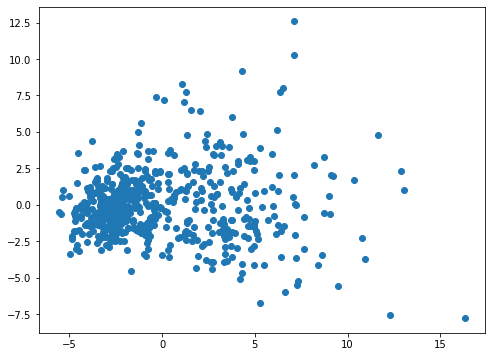

In [26]:
#plotting the transformed dataset
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],)

Text(0, 0.5, 'Second Principal Component')

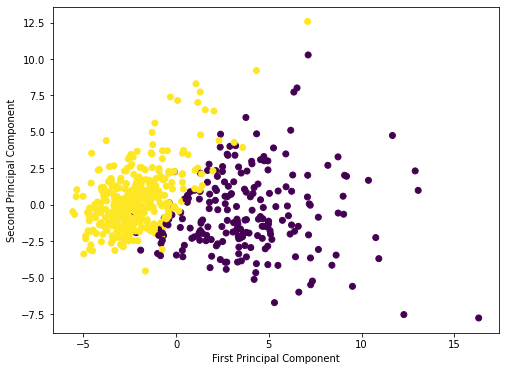

In [29]:
#this is not easy to interpret at first but adding a color filter helps show the variance
#now we can see clearly which tumors are benign or malignant
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [31]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [32]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

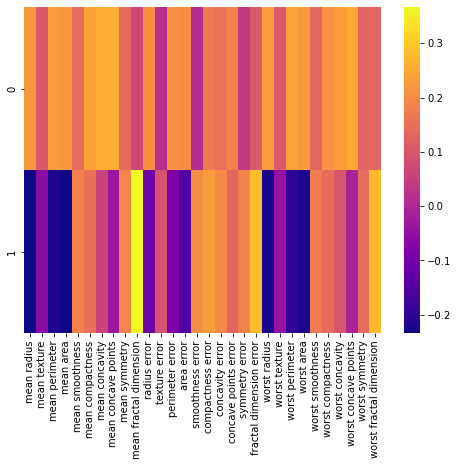

In [38]:
#this is map of correlation of the feature components
plt.figure(figsize=(8,6))
sb.heatmap(df_comp,cmap='plasma')